# Preprocesamiento de datos

### Lectura de Dataframes

In [30]:
import pandas as pd
import numpy as np
import os

In [31]:
raw_2020 = 'data/raw/DATOS HISTÓRICOS 2020_2021_TODAS ESTACIONES.xlsx'
raw_2022 = 'data/raw/DATOS HISTÓRICOS 2022_2023_TODAS ESTACIONES.xlsx'
raw_2023 = 'data/raw/DATOS HISTÓRICOS 2023_2024_TODAS ESTACIONES_ITESM.xlsx'
raw_2024 = 'data/raw/DATOS HISTÓRICOS 2024_TODAS ESTACIONES.xlsx'
raw_2025 = 'data/raw/DATOS HISTÓRICOS 2025_TODAS ESTACIONES.xlsx'

nombre_zona = ['NORTE', 'SURESTE', 'CENTRO']
nombre_hoja= ['NO','SE','CE']

limpieza_1=[raw_2020,raw_2022]
limpieza_2=[raw_2024,raw_2025]

### Limpieza 1: Se eligen las hojas con los nombres ['NORTE', 'SUR', 'CENTRO']


In [32]:
def limpieza1(datos_array):
    datos_limpios=[]

    for archivo in datos_array:
        datos_por_hoja = pd.read_excel(archivo, sheet_name=nombre_zona)

        for zona, df in datos_por_hoja.items():
            df['Zona'] = zona # Usamos la nueva variable local 'zona'

        data_combinada = pd.concat(datos_por_hoja.values(), ignore_index=True)
        datos_limpios.append(data_combinada)
    
    return datos_limpios

datos_limpios_20_22 = limpieza1(limpieza_1)

datos_limpios_20=datos_limpios_20_22[0]
datos_limpios_22=datos_limpios_20_22[1]


### Limpieza 2: Se eligen las hojas ['NO','SUR','CE']


In [33]:
mapa_zona = {
    'NO': 'NORTE',
    'SE': 'SURESTE',
    'CE': 'CENTRO'  
}

nombre_hoja = list(mapa_zona.keys()) 

def limpieza2(datos_array, sheet_names_map):    
    datos_limpios = []

    for archivo in datos_array:
        # Valores: DataFrame de cada hoja
        datos_por_hoja = pd.read_excel(archivo, sheet_name=nombre_hoja)

        # Lista para guardar los DFs limpios de *este* archivo
        dfs_del_archivo = []

        # Itera sobre cada hoja leída
        for nombre_hoja_actual, df_original in datos_por_hoja.items():
            
            # Asumimos que las filas 0 y 1 son cabeceras o unidades
            df_limpio = df_original.iloc[2:].reset_index(drop=True)

            # Busca el nombre de la hoja (ej. 'NO') en el mapa
            valor_zona = sheet_names_map[nombre_hoja_actual]
            df_limpio['Zona'] = valor_zona
            
            # Agrega el DF limpio a la lista de este archivo
            dfs_del_archivo.append(df_limpio)

        # Concatena todos los DFs limpios (NORTE, SUR, CENTRO) de *este* archivo
        data_combinada = pd.concat(dfs_del_archivo, ignore_index=True)
        datos_limpios.append(data_combinada)
    
    return datos_limpios

datos_limpios_24_25 = limpieza2(limpieza_2, mapa_zona)

datos_limpios_24=datos_limpios_24_25[0]

datos_limpios_25=datos_limpios_24_25[1]
datos_limpios_25.iloc[1:]

,date,CO,NO,NO2,NOX,O3,PM10,PM2.5,PRS,RAINF,RH,SO2,SR,TOUT,WSR,WDR,Zona
1,2025-01-01 02:00:00,2,2.3,8.1,10.4,30,81.0,NaN,715,0,NaN,7.3,0,NaN,0.6,122,NORTE
2,2025-01-01 03:00:00,1.8,2.4,9.7,12,24,64.0,NaN,714.9,0,NaN,4.6,0,NaN,2.5,157,NORTE
3,2025-01-01 04:00:00,2.57,7.3,13.2,20.4,16,68.0,NaN,714.8,0,NaN,4,0,NaN,1.6,201,NORTE
4,2025-01-01 05:00:00,2.39,6.5,15,21.5,4,113.0,NaN,715,0,NaN,3.3,0,NaN,6.8,258,NORTE
5,2025-01-01 06:00:00,1.91,2.6,12.3,14.9,7,85.0,NaN,715.4,0,NaN,3.1,0,NaN,3.4,271,NORTE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13022,2025-06-30 19:00:00,1.45,5.8,14.8,20.6,11,15.0,5.68,710.7,0,88,2.6,0.021,21.77,9.3,66,CENTRO
13023,2025-06-30 20:00:00,1.41,4.4,15,19.4,11,18.0,7.41,711,0,88,2.5,0,21.73,9.9,63,CENTRO
13024,2025-06-30 21:00:00,1.39,2.8,13.4,16.2,13,15.0,3.49,711.3,0,88,2.5,0,21.56,7.9,69,CENTRO
13025,2025-06-30 22:00:00,1.27,2.4,8.9,11.3,16,16.0,3.24,711.4,0,88,2.4,0,21.42,7.3,74,CENTRO


In [34]:
mapa_nombres = {
    'Fecha y hora': 'date',
    'CO (ppm)': 'CO',
    'NO (ppb)': 'NO',
    'NO2 (ppb)': 'NO2',
    'NOX (ppb)': 'NOX',
    'O3 (ppb)': 'O3',
    'PM10 (ug/m3)': 'PM10',
    'PM2.5 (ug/m3)': 'PM2.5',
    'PRS (mmHg)': 'PRS',
    'RAINF (mm/h)': 'RAINF',
    'RH (%)': 'RH',
    'SO2 (ppb)': 'SO2',
    'SR (kW/m2)': 'SR',
    'TOUT (ºC)': 'TOUT',
    'WSR (km/h)': 'WSR',
    'WDR (azimutal)': 'WDR',
    'Zona': 'Zona'  }

datos_limpios_24.rename(columns=mapa_nombres, inplace=True)

### Limpieza 3:

In [35]:
data_2023 = pd.read_excel(raw_2023, sheet_name="Param_horarios_Estaciones", header=[0, 1])
data_2023 = data_2023.rename(columns={'Unnamed: 0': 'Info', 'date': 'date'})
data_2023.columns = data_2023.columns.set_names(['Estacion', 'Medicion'])
data_2023.head()
    

Estacion   Unnamed: 0_level_0 SURESTE                                       \
Medicion   Unnamed: 0_level_1      CO    NO   NO2   NOX   O3   PM10  PM2.5   
0                        date     ppm   ppb   ppb   ppb  ppb  ug/m3  ug/m3   
1         2023-01-01 00:00:00    2.37  54.5  32.6  87.1    3    110     68   
2         2023-01-01 01:00:00    2.12  38.7  30.3  68.9    3    116  67.18   
3         2023-01-01 02:00:00    2.05  38.7  28.8  67.4    3    117  75.12   
4         2023-01-01 03:00:00     2.5  60.5  29.1  89.4    3    135  82.81   

Estacion                ... NOROESTE 3                                        \
Medicion    PRS  RAINF  ...       PM10  PM2.5    PRS  RAINF   RH  SO2     SR   
0          mmhg  mm/hr  ...      ug/m3  ug/m3   mmhg  mm/hr    %  ppb  KW/m2   
1         721.7      0  ...        NaN    NaN    NaN    NaN  NaN  NaN    NaN   
2         721.5      0  ...        246    NaN  707.4      0   59  2.9      0   
3         721.1      0  ...        239    NaN    707      0   59  3.2      0   
4         720.8      0  ...        275    NaN  706.8      0   59  2.3      0   

Estacion                    
Medicion   TOUT   WSR  WDR  
0          degC  KMPH  DEG  
1           NaN   NaN  NaN  
2         14.14  65.3   95  
3         14.11  60.9   90  
4         14.08  58.1   84  

[5 rows x 240 columns]

In [36]:
zonas_filtradas = ['NORTE', 'SURESTE', 'CENTRO']
columnas_a_mantener = [(('Unnamed: 0_level_0', 'Unnamed: 0_level_1'))] + \
                      [col for col in data_2023.columns if col[0] in zonas_filtradas]

# Aplicar el filtro
datos_limpios_2023_corregido = data_2023[columnas_a_mantener].copy()
datos_limpios_2023_corregido.head()

Estacion   Unnamed: 0_level_0 SURESTE                                       \
Medicion   Unnamed: 0_level_1      CO    NO   NO2   NOX   O3   PM10  PM2.5   
0                        date     ppm   ppb   ppb   ppb  ppb  ug/m3  ug/m3   
1         2023-01-01 00:00:00    2.37  54.5  32.6  87.1    3    110     68   
2         2023-01-01 01:00:00    2.12  38.7  30.3  68.9    3    116  67.18   
3         2023-01-01 02:00:00    2.05  38.7  28.8  67.4    3    117  75.12   
4         2023-01-01 03:00:00     2.5  60.5  29.1  89.4    3    135  82.81   

Estacion                ...   NORTE                                        \
Medicion    PRS  RAINF  ...   PM2.5    PRS  RAINF   RH  SO2     SR   TOUT   
0          mmhg  mm/hr  ...   ug/m3   mmhg  mm/hr    %  ppb  KW/m2   degC   
1         721.7      0  ...  369.16  715.7      0  NaN  4.2      0  17.05   
2         721.5      0  ...  299.29  715.5      0  NaN    4      0  15.87   
3         721.1      0  ...  201.58  715.1      0  NaN  3.8      0  15.41   
4         720.8      0  ...  186.32  714.9      0  NaN  3.7      0  14.58   

Estacion                   
Medicion   WSR  WDV WDV.1  
0         KMPH  DEG   NaN  
1          3.8   18   NaN  
2          4.5   15   NaN  
3          4.8   28   NaN  
4          2.8   26   NaN  

[5 rows x 49 columns]

In [37]:
df_para_unpivot = datos_limpios_2023_corregido.set_index(('Unnamed: 0_level_0', 'Unnamed: 0_level_1'))
df_para_unpivot.index.name = 'date'

df_unpivoted = df_para_unpivot.stack(level=0)
#Limpiar el DataFrame reseteando el índice
df_unpivoted_final = df_unpivoted.reset_index()
df_unpivoted_final=df_unpivoted_final.iloc[3:]
# Limpiar el nombre del índice de columnas
df_unpivoted_final.columns.name = None
# Renombrar la columna 'Estacion' a 'Zona' como tenías en tus otras limpiezas
datos_limpios_23 = df_unpivoted_final.rename(columns={'Estacion': 'Zona'})
datos_limpios_23.head()

/var/folders/0p/t_nmy1zs1jgc_z9_lggdxk7m0000gn/T/ipykernel_25822/197867326.py:4: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  df_unpivoted = df_para_unpivot.stack(level=0)


,date,Zona,CO,NO,NO2,NOX,O3,PM10,PM2.5,PRS,RAINF,RH,SO2,SR,TOUT,WSR,WDV,WDV.1
3,2023-01-01 00:00:00,CENTRO,1.67,4.1,30.3,34.5,9,118,94.12,718.4,0,45,3.3,0,17.65,4.9,236,NaN
4,2023-01-01 00:00:00,NORTE,7.46,130.4,43.2,173.5,12,522,369.16,715.7,0,NaN,4.2,0,17.05,3.8,18,NaN
5,2023-01-01 00:00:00,SURESTE,2.37,54.5,32.6,87.1,3,110,68,721.7,0,68,3.5,0,16.39,3.2,257,NaN
6,2023-01-01 01:00:00,CENTRO,1.7,5,28.9,34.1,9,97,96.79,710.7,0,47,3.4,0.001,17.12,3.4,336,NaN
7,2023-01-01 01:00:00,NORTE,4.16,56.2,41.1,97.2,9,712,299.29,715.5,0,NaN,4,0,15.87,4.5,15,NaN


In [38]:
columnas_estandar = [
    'date', 'CO', 'NO', 'NO2', 'NOX', 'O3', 'PM10', 'PM2.5', 'PRS', 
    'RAINF', 'RH', 'SO2', 'SR', 'TOUT', 'WSR', 'WDR', 'Zona','WDV'
]
datos_limpios_23 = datos_limpios_23.reindex(columns=columnas_estandar)
datos_limpios_23

,date,CO,NO,NO2,NOX,O3,PM10,PM2.5,PRS,RAINF,RH,SO2,SR,TOUT,WSR,WDR,Zona,WDV
3,2023-01-01 00:00:00,1.67,4.1,30.3,34.5,9,118,94.12,718.4,0,45,3.3,0,17.65,4.9,NaN,CENTRO,236
4,2023-01-01 00:00:00,7.46,130.4,43.2,173.5,12,522,369.16,715.7,0,NaN,4.2,0,17.05,3.8,NaN,NORTE,18
5,2023-01-01 00:00:00,2.37,54.5,32.6,87.1,3,110,68,721.7,0,68,3.5,0,16.39,3.2,NaN,SURESTE,257
6,2023-01-01 01:00:00,1.7,5,28.9,34.1,9,97,96.79,710.7,0,47,3.4,0.001,17.12,3.4,NaN,CENTRO,336
7,2023-01-01 01:00:00,4.16,56.2,41.1,97.2,9,712,299.29,715.5,0,NaN,4,0,15.87,4.5,NaN,NORTE,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41392,2024-07-31 21:00:00,0.65,2.7,3.9,6.6,24,83,NaN,722.1,0,50,2.1,0,29.85,19.8,NaN,SURESTE,143
41393,2024-07-31 22:00:00,0.57,1.9,5.9,8,22,85,33.73,711.7,0,50,2.7,0.001,28,11.5,NaN,CENTRO,118
41394,2024-07-31 22:00:00,0.65,2.8,3.9,6.7,23,95,NaN,722.5,0,52,2,0,29.29,21.4,NaN,SURESTE,129
41395,2024-07-31 23:00:00,0.55,NaN,4.8,6.9,22,85,34.73,712.3,0,54,2.7,0.001,27.15,10.5,NaN,CENTRO,128


In [39]:
datos_limpios_23['WDR'] = datos_limpios_23['WDR'].fillna(datos_limpios_23['WDV'])
columnas_a_eliminar = ['WDV', 'WDR.1', 'WDV.1']
datos_limpios_23.drop(columns=columnas_a_eliminar, inplace=True, errors='ignore')

/var/folders/0p/t_nmy1zs1jgc_z9_lggdxk7m0000gn/T/ipykernel_25822/2912945838.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  datos_limpios_23['WDR'] = datos_limpios_23['WDR'].fillna(datos_limpios_23['WDV'])


### Check de Datos limpios

In [40]:
print("2020", datos_limpios_20.shape)
print("2022", datos_limpios_22.shape)
print("2023", datos_limpios_23.shape)
print("2024", datos_limpios_24.shape)
print("2025", datos_limpios_25.shape)

2020 (52610, 17)
2022 (42765, 17)
2023 (41394, 17)
2024 (26345, 17)
2025 (13027, 17)


In [41]:
print("20", datos_limpios_20.columns)
print("22", datos_limpios_22.columns)
print("23", datos_limpios_23.columns)
print("24", datos_limpios_24.columns)
print("25", datos_limpios_25.columns)

20 Index(['date', 'CO', 'NO', 'NO2', 'NOX', 'O3', 'PM10', 'PM2.5', 'PRS', 'RAINF',
       'RH', 'SO2', 'SR', 'TOUT', 'WSR', 'WDR', 'Zona'],
      dtype='object')
22 Index(['date', 'CO', 'NO', 'NO2', 'NOX', 'O3', 'PM10', 'PM2.5', 'PRS', 'RAINF',
       'RH', 'SO2', 'SR', 'TOUT', 'WSR', 'WDR', 'Zona'],
      dtype='object')
23 Index(['date', 'CO', 'NO', 'NO2', 'NOX', 'O3', 'PM10', 'PM2.5', 'PRS', 'RAINF',
       'RH', 'SO2', 'SR', 'TOUT', 'WSR', 'WDR', 'Zona'],
      dtype='object')
24 Index(['date', 'CO', 'NO', 'NO2', 'NOX', 'O3', 'PM10', 'PM2.5', 'PRS', 'RAINF',
       'RH', 'SO2', 'SR', 'TOUT', 'WSR', 'WDR', 'Zona'],
      dtype='object')
25 Index(['date', 'CO', 'NO', 'NO2', 'NOX', 'O3', 'PM10', 'PM2.5', 'PRS', 'RAINF',
       'RH', 'SO2', 'SR', 'TOUT', 'WSR', 'WDR', 'Zona'],
      dtype='object')


#### Guardamos

In [42]:
output_dir = "data/interim"

print(f"Guardando archivos en {output_dir}...")
datos_limpios_20.to_csv(f"{output_dir}/datos_limpios_2020.csv", index=False)
datos_limpios_22.to_csv(f"{output_dir}/datos_limpios_2022.csv", index=False)
datos_limpios_23.to_csv(f"{output_dir}/datos_limpios_2023.csv", index=False)
datos_limpios_24.to_csv(f"{output_dir}/datos_limpios_2024.csv", index=False)
datos_limpios_25.to_csv(f"{output_dir}/datos_limpios_2025.csv", index=False)


Guardando archivos en data/interim...


### Union de df

In [43]:
lista_dfs = [
    datos_limpios_20,
    datos_limpios_22,
    datos_limpios_23,
    datos_limpios_24,
    datos_limpios_25
]

columnas_especiales = ['date', 'Zona']

for df in lista_dfs:
    columnas_a_convertir = df.columns.drop(columnas_especiales)
    for col in columnas_a_convertir:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    
    df['date'] = pd.to_datetime(df['date'], errors='coerce')

data_combinada_final = pd.concat(lista_dfs, ignore_index=True)
data_combinada_final

,date,CO,NO,NO2,NOX,O3,PM10,PM2.5,PRS,RAINF,RH,SO2,SR,TOUT,WSR,WDR,Zona
0,2020-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,52.0,49.71,NaN,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NORTE
1,2020-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,53.0,46.70,715.1,0.0,88.0,NaN,0.002,11.14,1.3,3.0,NORTE
2,2020-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,59.0,44.42,714.1,0.0,88.0,NaN,0.002,11.35,1.3,119.0,NORTE
3,2020-01-01 03:00:00,NaN,NaN,NaN,NaN,NaN,60.0,46.84,713.8,0.0,88.0,NaN,0.002,11.52,1.3,110.0,NORTE
4,2020-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN,59.0,33.15,713.3,0.0,88.0,NaN,0.002,11.52,NaN,110.0,NORTE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176136,2025-06-30 19:00:00,1.45,5.8,14.8,20.6,11.0,15.0,5.68,710.7,0.0,88.0,2.6,0.021,21.77,9.3,66.0,CENTRO
176137,2025-06-30 20:00:00,1.41,4.4,15.0,19.4,11.0,18.0,7.41,711.0,0.0,88.0,2.5,0.000,21.73,9.9,63.0,CENTRO
176138,2025-06-30 21:00:00,1.39,2.8,13.4,16.2,13.0,15.0,3.49,711.3,0.0,88.0,2.5,0.000,21.56,7.9,69.0,CENTRO
176139,2025-06-30 22:00:00,1.27,2.4,8.9,11.3,16.0,16.0,3.24,711.4,0.0,88.0,2.4,0.000,21.42,7.3,74.0,CENTRO


In [44]:
data_combinada_final.shape

(176141, 17)

In [45]:
data_combinada_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176141 entries, 0 to 176140
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    176141 non-null  datetime64[ns]
 1   CO      154414 non-null  float64       
 2   NO      142280 non-null  float64       
 3   NO2     146232 non-null  float64       
 4   NOX     146594 non-null  float64       
 5   O3      156841 non-null  float64       
 6   PM10    167478 non-null  float64       
 7   PM2.5   139255 non-null  float64       
 8   PRS     160799 non-null  float64       
 9   RAINF   164605 non-null  float64       
 10  RH      148481 non-null  float64       
 11  SO2     154733 non-null  float64       
 12  SR      172127 non-null  float64       
 13  TOUT    155624 non-null  float64       
 14  WSR     163924 non-null  float64       
 15  WDR     152462 non-null  float64       
 16  Zona    176141 non-null  object        
dtypes: datetime64[ns](1), float64

### Eliminacion de duplicados

In [46]:
duplicates_combination = data_combinada_final.duplicated(subset=['date', 'Zona']).sum()

print(f"\n--- Comprobación 1: Duplicados por (Fecha + Zona) ---")
print(f"Número de registros con la misma 'date' y misma 'Zona': {duplicates_combination}")

#Verificación de filas completamente idénticas
#Esto busca filas donde todos los valores (CO, NO, O3, ..., Zona) son exactos
full_row_duplicates = df.duplicated().sum()

print(f"\n--- Comprobación 2: Filas completamente idénticas ---")
print(f"Número de filas totalmente idénticas (todos los valores): {full_row_duplicates}")


--- Comprobación 1: Duplicados por (Fecha + Zona) ---
Número de registros con la misma 'date' y misma 'Zona': 31640

--- Comprobación 2: Filas completamente idénticas ---
Número de filas totalmente idénticas (todos los valores): 0


In [47]:
df_cleaned = data_combinada_final.drop_duplicates(subset=['date', 'Zona'], keep='first')
rows_removed = data_combinada_final.shape[0] - df_cleaned.shape[0]

# 5. Sobrescribir el DataFrame original
df = df_cleaned.copy()

print(f"Se encontraron y eliminaron {rows_removed} duplicados (por fecha + zona).")
print(f"Número de filas después de la limpieza: {df.shape[0]}")

# (Opcional) Verificar que ya no hay duplicados
duplicates_remaining = df.reset_index().duplicated(subset=['date', 'Zona']).sum()
print(f"Verificación: Duplicados restantes = {duplicates_remaining}")

Se encontraron y eliminaron 31640 duplicados (por fecha + zona).
Número de filas después de la limpieza: 144501
Verificación: Duplicados restantes = 0


In [48]:
output_dir = "data/interim"

print(f"Guardando archivos en {output_dir}...")
df.to_csv(f"{output_dir}/data_limpios.csv", index=False)

Guardando archivos en data/interim...


## Dataframe unificado
* Años 2020-2025
* Zonas: Centro, Norte y Sur

In [49]:
df

,date,CO,NO,NO2,NOX,O3,PM10,PM2.5,PRS,RAINF,RH,SO2,SR,TOUT,WSR,WDR,Zona
0,2020-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,52.0,49.71,NaN,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NORTE
1,2020-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,53.0,46.70,715.1,0.0,88.0,NaN,0.002,11.14,1.3,3.0,NORTE
2,2020-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,59.0,44.42,714.1,0.0,88.0,NaN,0.002,11.35,1.3,119.0,NORTE
3,2020-01-01 03:00:00,NaN,NaN,NaN,NaN,NaN,60.0,46.84,713.8,0.0,88.0,NaN,0.002,11.52,1.3,110.0,NORTE
4,2020-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN,59.0,33.15,713.3,0.0,88.0,NaN,0.002,11.52,NaN,110.0,NORTE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176136,2025-06-30 19:00:00,1.45,5.8,14.8,20.6,11.0,15.0,5.68,710.7,0.0,88.0,2.6,0.021,21.77,9.3,66.0,CENTRO
176137,2025-06-30 20:00:00,1.41,4.4,15.0,19.4,11.0,18.0,7.41,711.0,0.0,88.0,2.5,0.000,21.73,9.9,63.0,CENTRO
176138,2025-06-30 21:00:00,1.39,2.8,13.4,16.2,13.0,15.0,3.49,711.3,0.0,88.0,2.5,0.000,21.56,7.9,69.0,CENTRO
176139,2025-06-30 22:00:00,1.27,2.4,8.9,11.3,16.0,16.0,3.24,711.4,0.0,88.0,2.4,0.000,21.42,7.3,74.0,CENTRO


Decidimos quedarnos con CO, NO2, PM2.5


In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

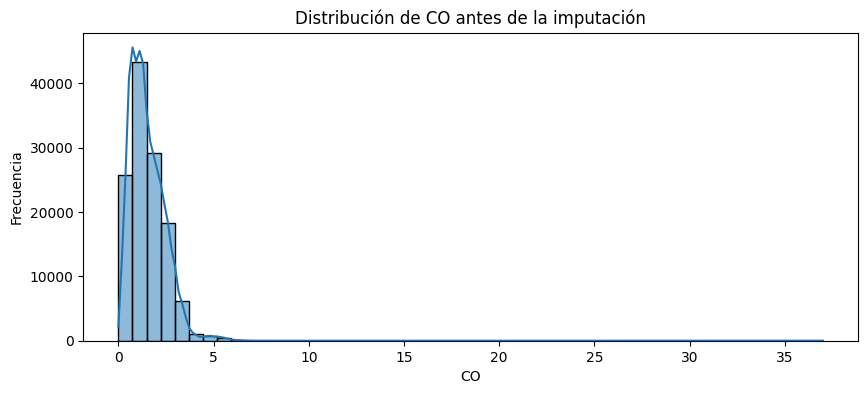

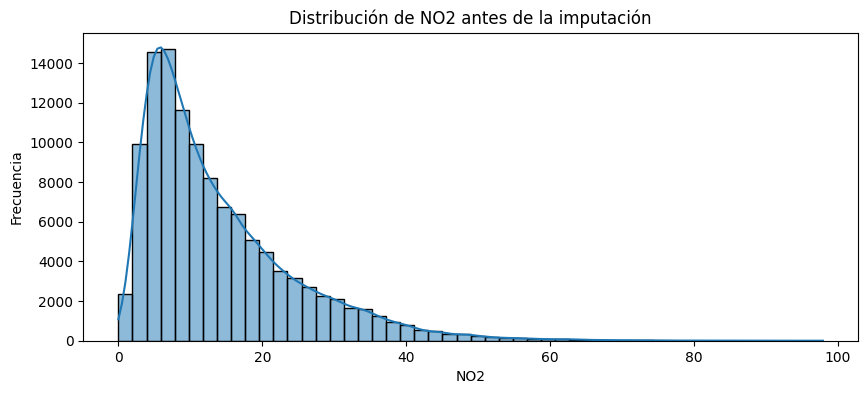

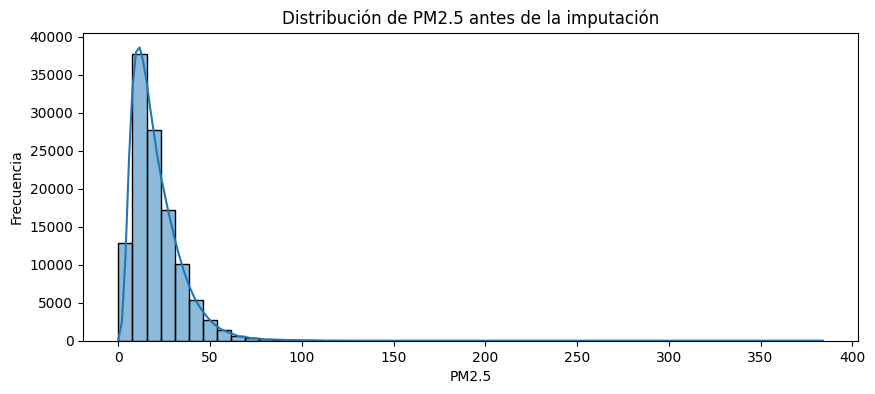

In [51]:
cols=['CO', 'NO2','PM2.5']

for col in cols:
    plt.figure(figsize=(10, 4))
    sns.histplot(df[col].dropna(), bins=50, kde=True)
    plt.title(f'Distribución de {col} antes de la imputación')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()  

Creamos otra dataframe con los datos que queremos

In [52]:
cols=['CO', 'NO2','PM2.5','Zona']
df_comp = pd.DataFrame(df, columns=cols)
df_comp

,CO,NO2,PM2.5,Zona
0,NaN,NaN,49.71,NORTE
1,NaN,NaN,46.70,NORTE
2,NaN,NaN,44.42,NORTE
3,NaN,NaN,46.84,NORTE
4,NaN,NaN,33.15,NORTE
...,...,...,...,...
176136,1.45,14.8,5.68,CENTRO
176137,1.41,15.0,7.41,CENTRO
176138,1.39,13.4,3.49,CENTRO
176139,1.27,8.9,3.24,CENTRO


## Imputacion de datos
Usaremos df

In [53]:
def obtener_longitud_brechas(columna_temporal: pd.Series) -> pd.Series:
    """
    Identifica todas las brechas (gaps) de datos faltantes y devuelve
    una Serie que contiene la longitud de cada brecha.

    El output es la data cruda para un histograma.

    Argumentos:
      columna_temporal: Una pd.Series (ej. df['O3']) con un índice.

    Devuelve:
      pd.Series: "Datos para graficar". 
                 Cada valor en la Serie es la longitud de una brecha 
                 de nulos.
    """
    # 1. Identificar dónde están los nulos
    es_nulo = columna_temporal.isnull()
    
    # 2. Crear un ID de grupo para cada bloque consecutivo de nulos o no-nulos.
    # .diff() detecta el cambio de False a True (o viceversa).
    # .ne(0) marca esos cambios.
    # .cumsum() asigna un ID único a cada bloque.
    group_id = es_nulo.astype(int).diff().ne(0).cumsum()
    
    # 3. Filtrar para quedarnos solo con los grupos que SÍ son nulos
    brechas_grupos = group_id[es_nulo]
    
    # 4. Contar el tamaño (longitud) de cada grupo (brecha)
    # Esto devuelve una Serie donde el índice es el 'group_id' 
    # y el valor es su longitud.
    longitud_de_cada_brecha = brechas_grupos.value_counts()
    
    # 5. Nombrar la Serie para claridad
    longitud_de_cada_brecha.name = "longitud_de_brecha"
    
    # El output es una Serie que lista todas las longitudes (ej. [3, 1, 1, 5, ...])
    return longitud_de_cada_brecha

Datos para el histograma:
count      969.000000
mean        20.185759
std        336.006064
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max      10182.000000
Name: longitud_de_brecha, dtype: float64


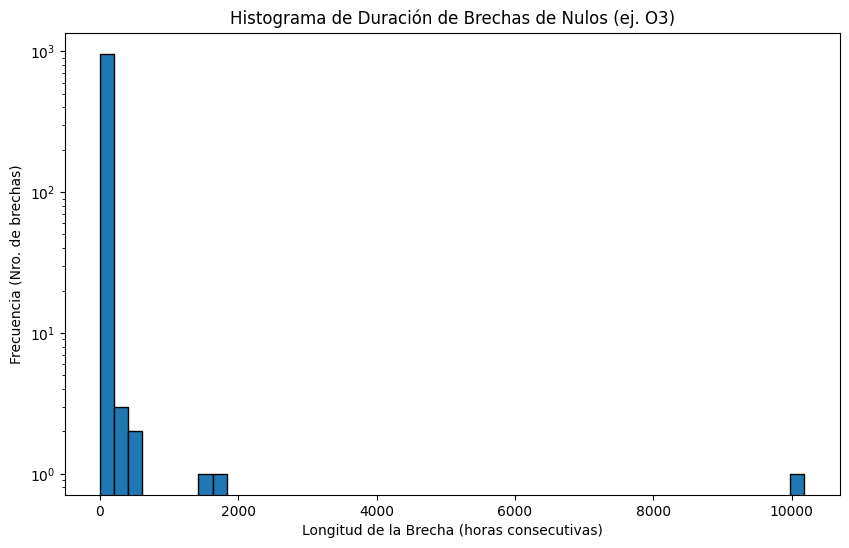

In [54]:
no_series = df_comp['CO']
datos_hist = obtener_longitud_brechas(no_series)

print("Datos para el histograma:")
print(datos_hist.describe())
#
import matplotlib.pyplot as plt
#
plt.figure(figsize=(10, 6))
datos_hist.plot(kind='hist', 
                 bins=50, 
                 title='Histograma de Duración de Brechas de Nulos (ej. O3)',
                 edgecolor='black')
plt.xlabel('Longitud de la Brecha (horas consecutivas)')
plt.ylabel('Frecuencia (Nro. de brechas)')
plt.yscale('log') # Usar escala logarítmica es útil aquí
plt.show()

In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def porcentaje_nulos_por_anio(df_temporal: pd.DataFrame) -> pd.DataFrame:
    """
    Calcula el porcentaje de datos faltantes para cada columna,
    agrupado por año.

    Argumentos:
      df_temporal: pd.DataFrame con un pd.DatetimeIndex.

    Devuelve:
      pd.DataFrame: "Datos para graficar".
                    Índice = Año
                    Columnas = Variables del DataFrame original
                    Valores = Porcentaje de nulos (0-100)
    """
    if not isinstance(df_temporal.index, pd.DatetimeIndex):
        raise ValueError("El DataFrame de entrada debe tener un pd.DatetimeIndex.")

    # 1. Agrupar por el atributo 'year' del índice temporal
    grupos_anuales = df_temporal.groupby(df_temporal.index.year)

    # 2. Calcular el % de nulos para cada grupo (año)
    # .apply() itera sobre cada grupo
    # df_anio.isnull().sum() cuenta nulos por columna
    # len(df_anio) es el total de registros en ese año
    porcentaje_nulos = grupos_anuales.apply(
        lambda df_anio: (df_anio.isnull().sum() / len(df_anio)) * 100
    )

    # 3. Formatear el output
    porcentaje_nulos.index.name = "Año"
    return porcentaje_nulos

DataFrame cargado. Rango de fechas: 2020-01-01 00:00:00 a 2025-06-30 23:00:00

Datos para el Heatmap (Porcentaje de Nulos por Año):
             CO         NO        NO2        NOX         O3       PM10  \
Año                                                                      
2020  37.606805  71.898378  70.341397  69.335055  41.282801  12.038127   
2021  12.672680  28.035925  23.096244  23.347414  12.079004   4.890208   
2022   1.556317   4.558600   3.238204   3.257230   3.512177   3.238204   
2023   3.095338   4.208440   2.241452   2.264324   4.566767   3.369801   
2024  10.455011   4.997913   3.931540   3.521688   3.848051   3.191530   
2025  18.047133  11.345667   6.286943   5.749597   4.122208   2.663698   

          PM2.5        PRS      RAINF         RH        SO2        SR  \
Año                                                                     
2020  21.053431  35.909315  24.395246  29.996582  39.243535  2.886112   
2021  10.777486  12.505233  10.187617  12.493816  17.985

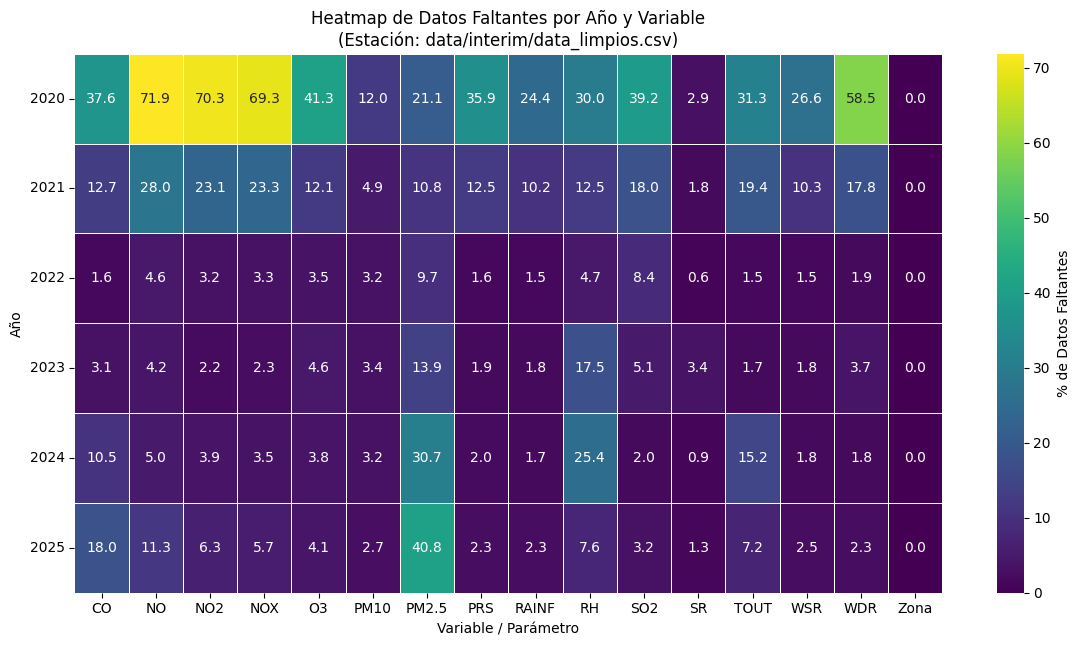

In [56]:
# --- Configuración del Ejemplo ---

# 1. Definir el archivo a cargar
# (Asegúrate de que la ruta sea correcta si lo ejecutas)
file_path = 'data/interim/data_limpios.csv'

try:
    # 2. Cargar datos
    # Es crucial definir na_values=['NULL'] y parsear el índice
    df = pd.read_csv(
        file_path,
        na_values=['NULL', 'Null', 'null'], # Tratar 'NULL' como NaN
        parse_dates=['date'],               # Convertir 'date' a datetime
        index_col='date'                    # Poner 'date' como índice
    )
    
    print(f"DataFrame cargado. Rango de fechas: {df.index.min()} a {df.index.max()}")

    # --- Ejecución de la Función ---
    
    # 1. Obtener los datos para el heatmap
    datos_heatmap = porcentaje_nulos_por_anio(df)
    
    print("\nDatos para el Heatmap (Porcentaje de Nulos por Año):")
    print(datos_heatmap)
    
    # --- Generación de la Visualización ---
    
    # 2. Graficar la visualización (un heatmap)
    print("\nGenerando visualización (Heatmap)...")
    
    plt.figure(figsize=(14, 7)) # Ajustar tamaño
    
    # Usamos seaborn para el mapa de calor
    sns.heatmap(
        datos_heatmap,
        annot=True,      # Mostrar los números (porcentajes)
        fmt=".1f",       # Formato: 1 decimal
        cmap='viridis',  # Paleta de color (ej. 'viridis', 'plasma', 'rocket_r')
        linewidths=.5,
        cbar_kws={'label': '% de Datos Faltantes'} # Etiqueta de la barra de color
    )
    
    plt.title(f'Heatmap de Datos Faltantes por Año y Variable\n(Estación: {file_path})')
    plt.ylabel('Año')
    plt.xlabel('Variable / Parámetro')
    plt.yticks(rotation=0) # Asegurar que los años estén horizontales
    plt.show()

except FileNotFoundError:
    print(f"Error: No se encontró el archivo '{file_path}'.")
except Exception as e:
    print(f"Ocurrió un error: {e}")

Generando matriz de ausentismo (visualización de líneas)...


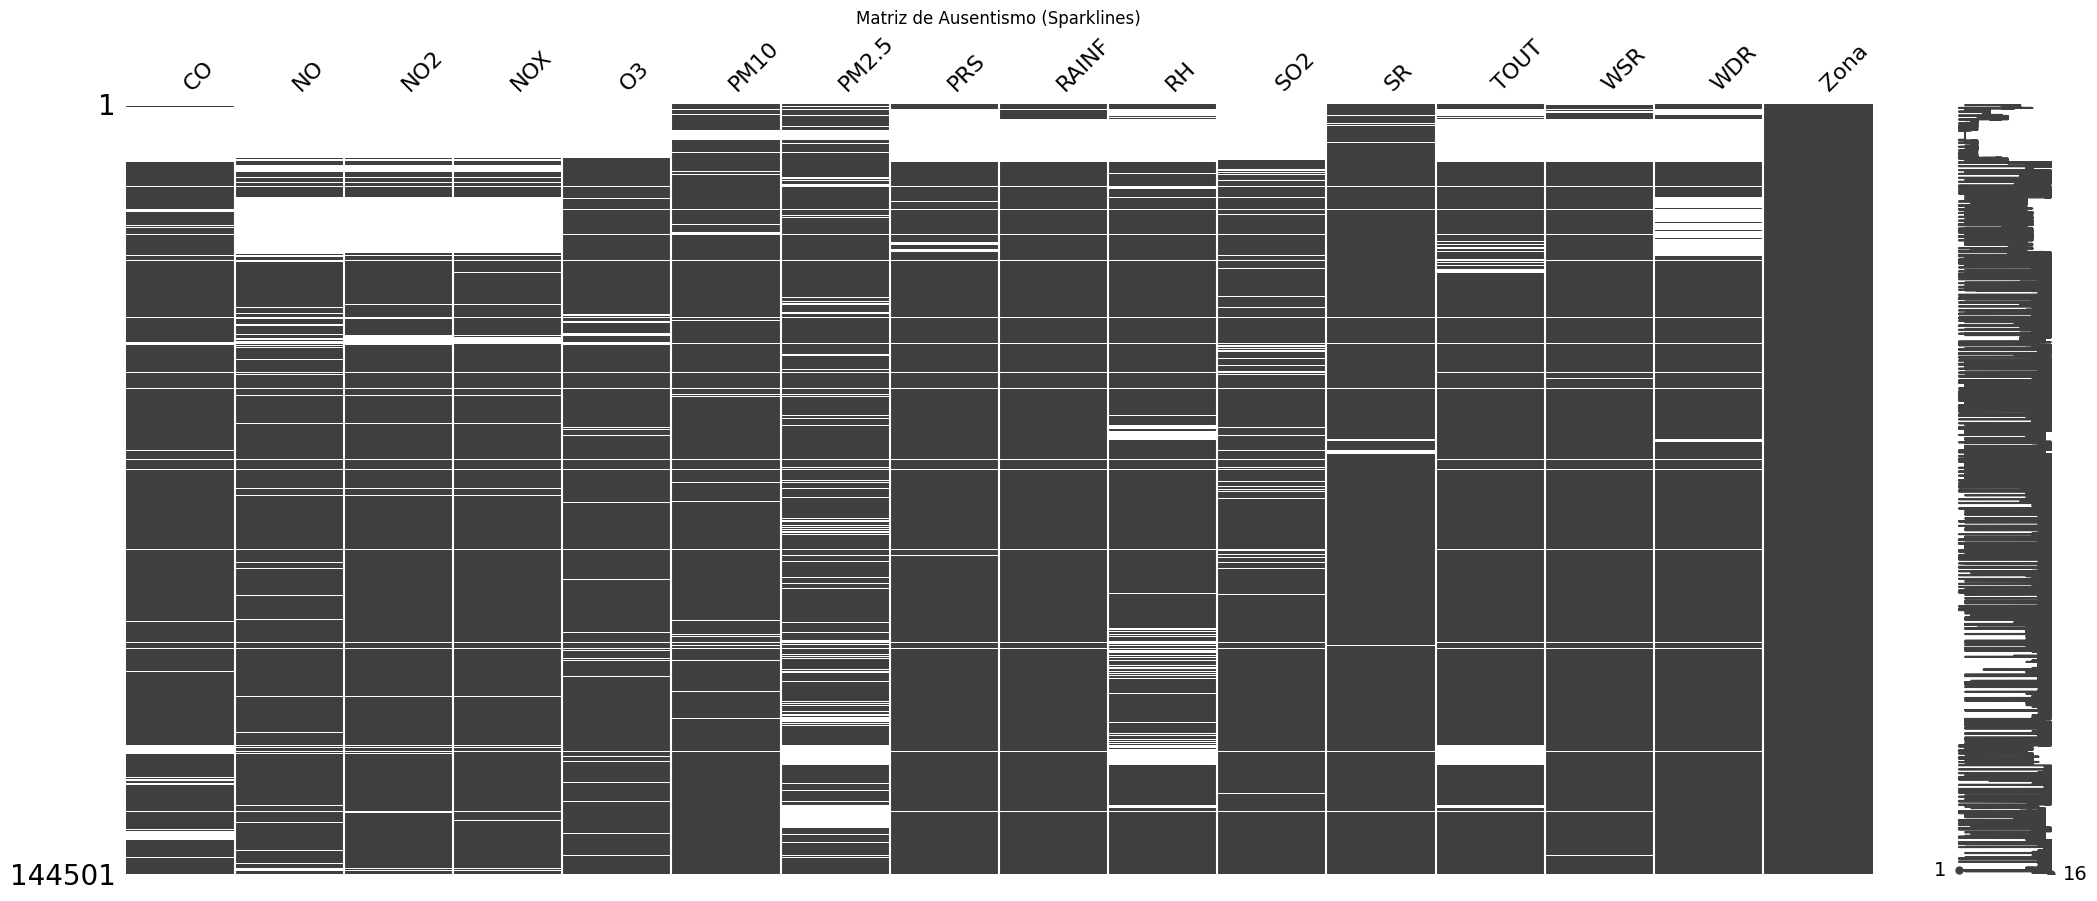

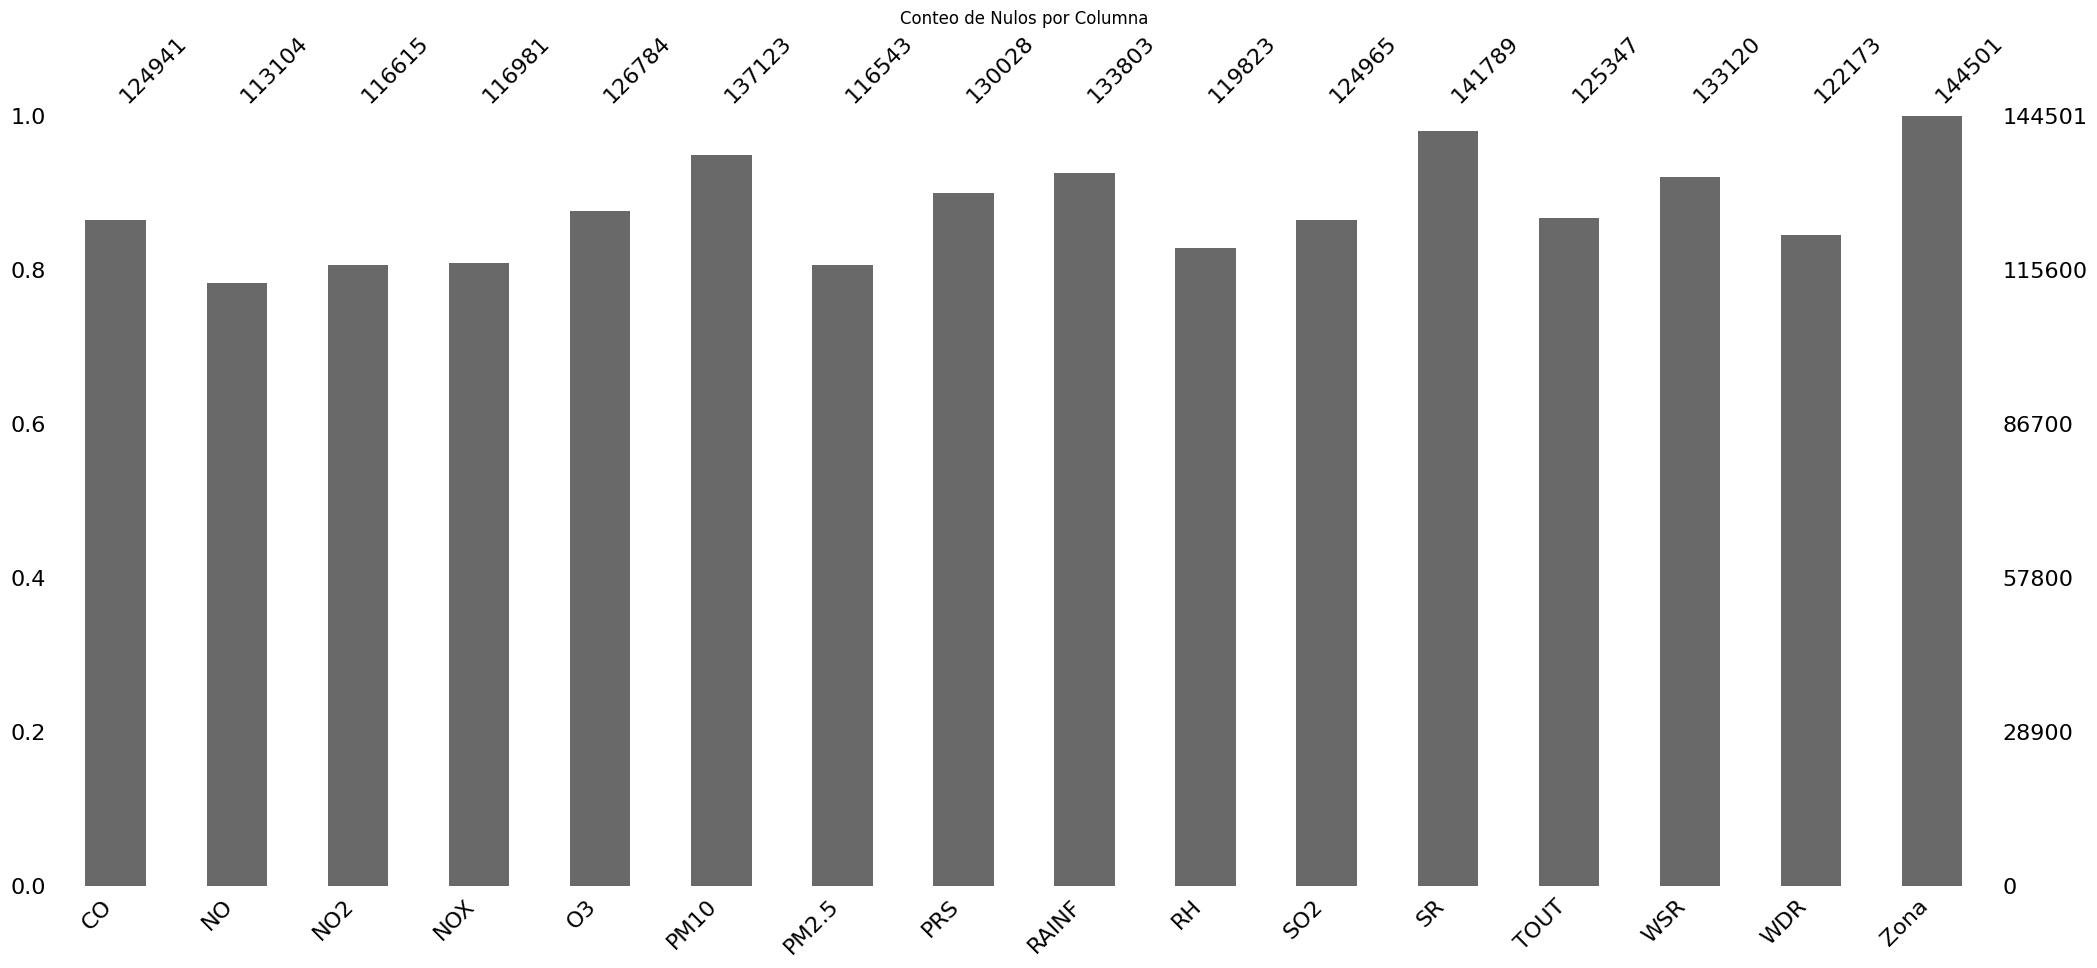

In [57]:
# pip install missingno
import missingno as msno
import matplotlib.pyplot as plt

# Asumiendo 'df' es tu DataFrame completo
# (No solo una columna)

# 1. El "line plot" que mencionaste (msno.matrix)
# Esto muestra los nulos como líneas blancas en una matriz
print("Generando matriz de ausentismo (visualización de líneas)...")
msno.matrix(df)
plt.title('Matriz de Ausentismo (Sparklines)')
plt.show()

# 2. El "histograma" que mencionaste (msno.bar)
# Es un conteo simple de nulos por columna
msno.bar(df)
plt.title('Conteo de Nulos por Columna')
plt.show()